# **Анализ результатов А/В-теста интернет-магазина**
**Цель исследования**
Анализ гипотез для увеличения выручки крупного интернет-магазина посредствам A/B-тестирования.

**Ход исследования**

1. Загрузка данных, ознакомление с данными, подготовка к анализу. 

2. Приоритизация гипотез.
    1. Применение фреймворка ICE для приоритизации гипотез. 
    2. Применение фреймворка RICE для приоритизации гипотез. 
    3. Промежуточный вывод.
    
3. Анализ A/B-теста:
    1. График кумулятивной выручки по группам. Выводы и предположения.
    2. График кумулятивного среднего чека по группам. Выводы и предположения.
    3. График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
    4. График кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения.
    5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения.
    6. Точечный график количества заказов по пользователям. Выводы и предположения.
    7. Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.
    8. Точечный график стоимостей заказов. Выводы и предположения.
    9. Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.
    10. Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения.
    11. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
    12. Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения.
    13. Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
    14. Принятие решения по результатам теста.


# **1. Загрузка данных, ознакомление с данными, подготовка к анализу**

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt



In [2]:
try:
    hypothesis = pd.read_csv('C:/Users/user/Desktop/123/Анализ результатов АВ-теста интернет-магазина/hypothesis.csv')
    orders = pd.read_csv('C:/Users/user/Desktop/123/Анализ результатов АВ-теста интернет-магазина/orders.csv')
    visitors = pd.read_csv('C:/Users/user/Desktop/123/Анализ результатов АВ-теста интернет-магазина/visitors.csv')
    
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    
pd.set_option('display.max_colwidth', None)
    

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле собраны 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Пропусков и дублей нет. Преобразуем названия заголовков.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()
print('Кол-во дубликатов', orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Кол-во дубликатов 0


In [7]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}) 
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

В таблице orders собраны данные о заказах, выручке и группе А/В теста. Дубликатов и пропусков нет. Приведем столбец 'date' к типу datetime, а названия столбцов приведем к змеиному регистру, для удобства дальнейшей работы.

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()
print('Кол-во дубликатов', visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Кол-во дубликатов 0


В таблице visitors собраны данные о количестве пользователей, посетивших сайт в указанную дату и группе А/В теста. Дубликатов и пропусков нет. Приведем столбец 'date' к типу datetime.

In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
orders.groupby('group')['visitor_id'].count()

group
A    557
B    640
Name: visitor_id, dtype: int64

Пользователи разделены на группы неравномерно 46,5%/53,5%. Входных данных недостаточно, чтобы однозначно сказать - так было задумано первоначально или это программный сбой распределения пользователей по группам.

In [14]:
# подсчитаем, в скольки группах сстоит каждый из пользователей 
v = orders.groupby('visitor_id')['group'].nunique()
# подсчитаем, сколько пользователей попали в обе группы
v.reset_index().query('group > 1').count()

visitor_id    58
group         58
dtype: int64

In [15]:
# подсчитаем количество уникальных посетителей
len(set(orders['visitor_id']))

1031

58 пользователей попали сразу в обе группы теста. Такого быть не должно. 58 пользователей - это 5,6% всех пользователей. Их действия могут повлиять на результат А/В теста. 

In [16]:
# orders[orders['visitor_id']==2458001652]
# orders[orders['visitor_id']==1959144690]

In [17]:
# определим этих пользователей в отдельную группу (переменную)
annormal_visitor = orders.groupby('visitor_id')[['group', 'transaction_id']].nunique().reset_index().query('group > 1')
annormal_visitor.head(10)

,visitor_id,group,transaction_id
2,8300375,2,2
44,199603092,2,5
51,232979603,2,2
55,237748145,2,5
66,276558944,2,2
84,351125977,2,2
97,393266494,2,3
114,457167155,2,4
119,471551937,2,2
122,477780734,2,2


In [18]:
annormal_visitor['transaction_id'].sum()

181

При этом 58 аномальных пользователей сделали 181 заказ. Это уже значительная цифра в рамках исследования (181 от 1197 - 15% заказов).  Можно удалить данные об аномальных пользователях из таблицы orders, при этом из обоих групп теста. Но при этом в анализе А/В теста используются также данные таблицы visitors. В таблице visitors содержатся агрегированные данные о посетителях, т.е. удалив данные о пересекающихся пользователях из orders данные об этих пользователях все-равно останутся в таблице visitors, что впоследствии также исказит результаты анализа. Возможно пользователи не раз заходили на сайт, перед тем, как сделать заказ.  Поэтому я считаю, что удалять пересекающихся пользователей в данном случае некорректно.

# **2. Приоритизация гипотез**

In [19]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Наиболее приоритетные гипотезы по ICE**

- №8 Запустить акцию, дающую скидку на товар в день рождения;
- №0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- №7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

In [20]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Наиболее приоритетные гипотезы по RICE**

- №7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- №2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- №0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE.
Наболее перспективная гипотеза по ICE №8 оказалась на пятом месте при расчете RICE. Этот показатель также оказал влияние и на другие гипотезы. Тем не менее, учитывая результаты обеих приоритизаций гипотез наиболее важной для проверки является гипотеза №7. Считаю, что с нее и стоит начать тестирование.

# **3. Анализ A/B-теста**
## **3.1 График кумулятивной выручки по группам. Выводы и предположения**

In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


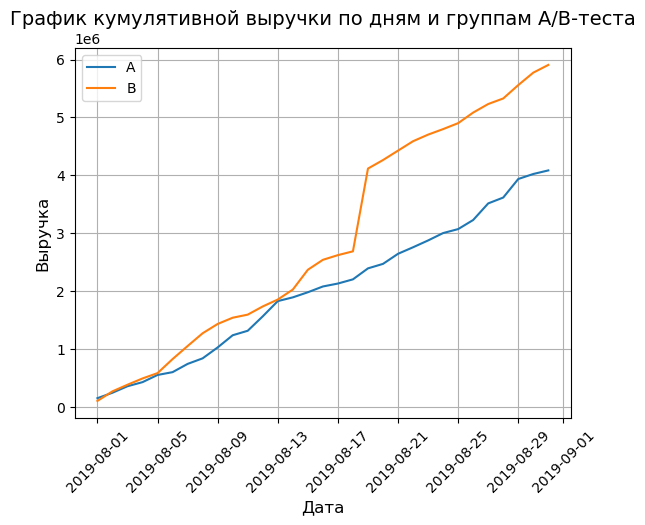

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid(True)
plt.title('График кумулятивной выручки по дням и группам A/B-теста', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.xticks(rotation=45)
plt.legend() 
plt.show()

Выручка увеличивается в течение всего теста. 
Однако график выручки группы В резко вырос во второй половине августа 2019г. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

## **3.2 График кумулятивного среднего чека по группам. Выводы и предположения**

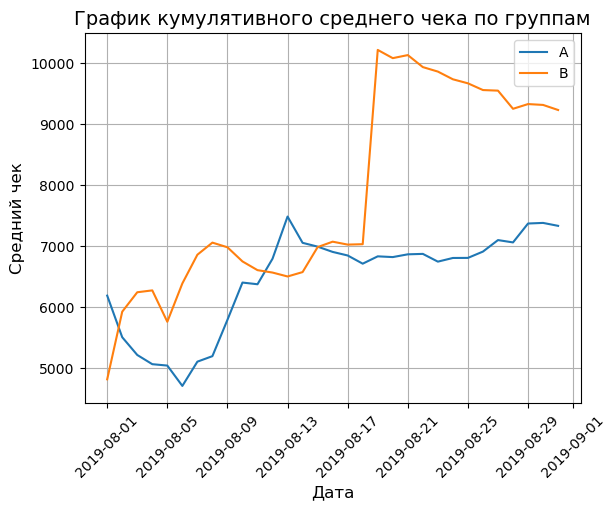

In [23]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid(True)
plt.title('График кумулятивного среднего чека по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)
plt.xticks(rotation=45)
plt.legend() 
plt.show()

В группе А средний чек становится равномерным ближе к концу теста и имеет тенденцию к росту. В группе В на графике четко отображается резкий скачок величины среднего чека в период 18.08.2019, а затем идет постепенное снижение величины среднего чека. Возможно, в группу В попал крупный заказ (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

## **3.3 График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения**

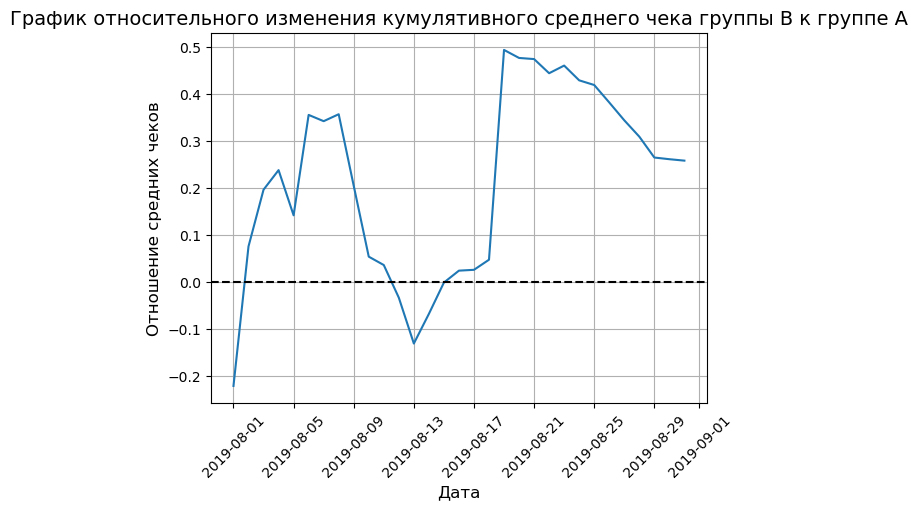

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

В нескольких точках на график видны резкие скачки. Это может говорить о наличии выбросов, т.е. крупных заказов.

## **3.4 График кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения**

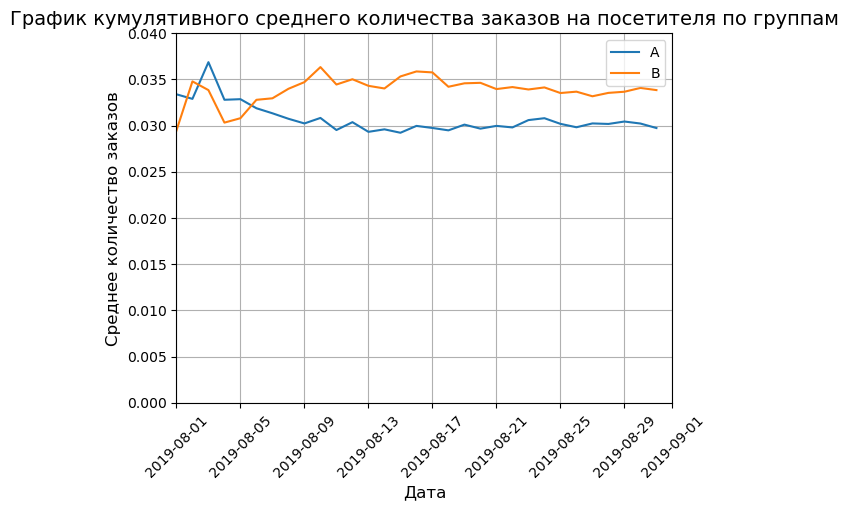

In [25]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders'] / cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders'] / cumulativeDataB['visitors'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04])
plt.grid(True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.legend() 
plt.show()


В начале теста среднее количество заказов на посетителя в группе А было выше, а затем незначительно снизилось, в отличии от группы В. В группе В среднее количество заказов на посетителя после снижения в начале тестирования возросто и колебалось на уровне 0,035. В группе А среднее количество заказов также установилось и колебалось в районе 0,030 заказов на посетителя.

## **3.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения**

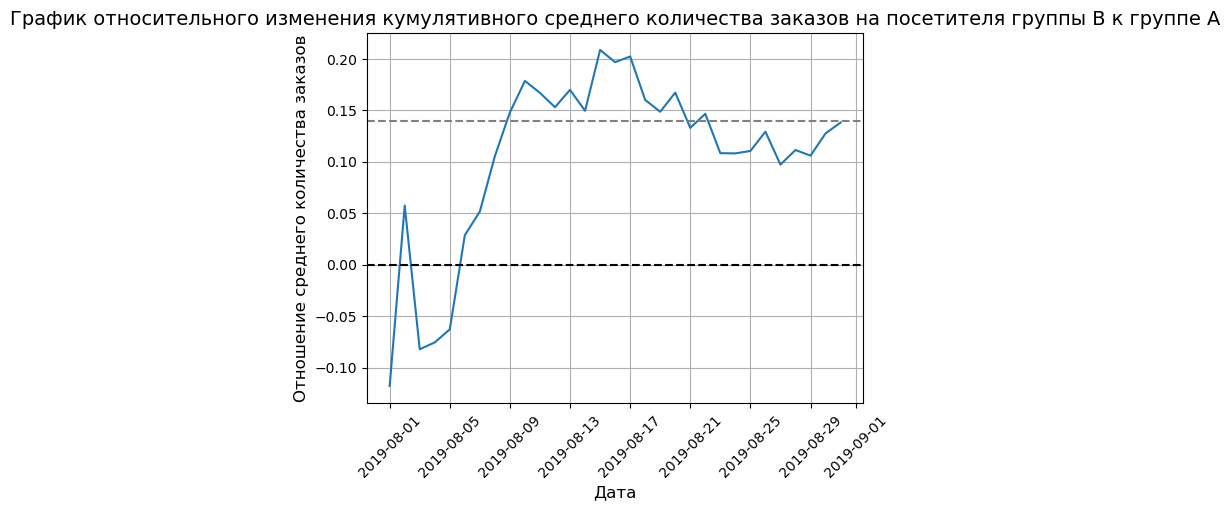

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeData['date'], 
         (mergedCumulativeData['ordersB']/mergedCumulativeData['visitorsB'])/(mergedCumulativeData['ordersA']/mergedCumulativeData['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение среднего количества заказов', fontsize=12)
plt.xticks(rotation=45) 

plt.show()


После 6 дней теста среднее количество заказов в группе В выше, чем в группе А. В целом отношение среднего количества заказов ещё не установилось, но после небольшого падения опять наметилась тенденция к росту.

## **3.6 Точечный график количества заказов по пользователям. Выводы и предположения**

Подсчитаем количество заказов по пользователям и посмотрим на результат.


In [27]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
ordersByUsers.columns = ['visitor_id', 'orders']


ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


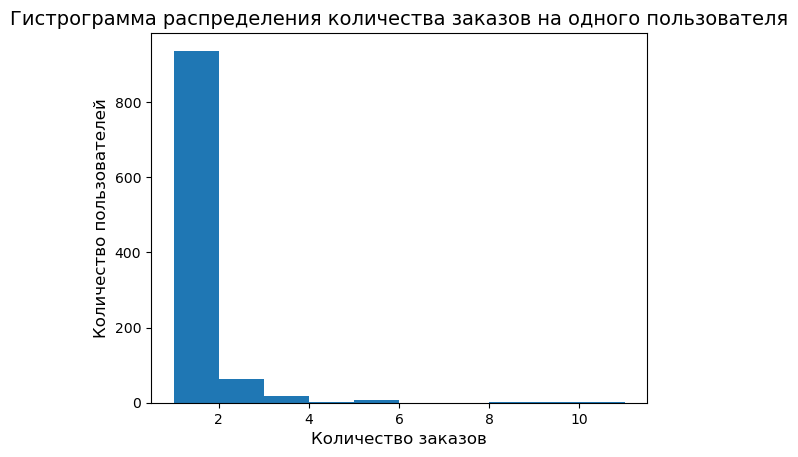

In [28]:
# Построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя', fontsize=14)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

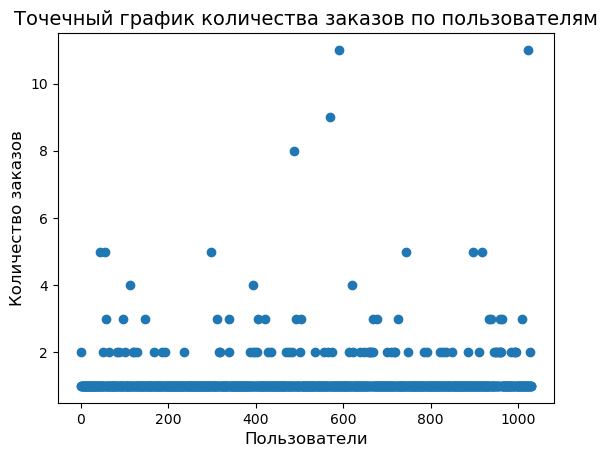

In [29]:
# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.xlabel('Пользователи', fontsize=12)
plt.show()

Есть пользователи, которые совершали 5, 8, 9, 11 заказов. Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

## **3.7 Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей**

In [30]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [95, 98, 99])

array([2., 3., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. 2% пользователей заказывали более трёх раз. И лишь 1 % пользователей совершили 4 и более заказов.
Выберем 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

## **3.8 Точечный график стоимостей заказов. Выводы и предположения**

In [31]:
# посмотрим на топ-5 самых дорогих заказов по стоимости
orders.sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


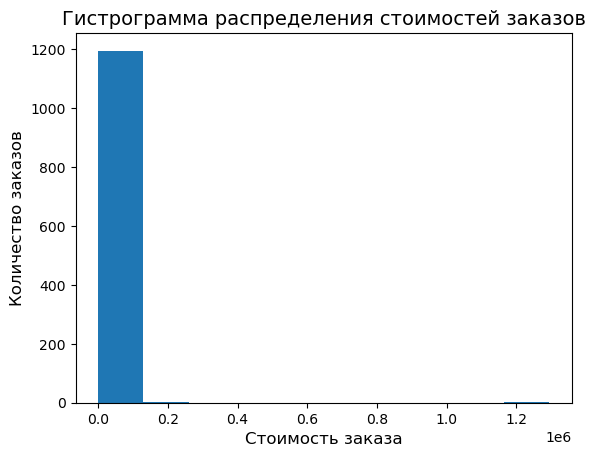

In [32]:
# Изучим гистограмму распределения стоимостей заказов
plt.hist(orders['revenue'])
plt.title('Гистрограмма распределения стоимостей заказов', fontsize=14)
plt.ylabel('Количество заказов', fontsize=12)
plt.xlabel('Стоимость заказа', fontsize=12)
plt.show()

Самый крупный заказ, который был сделан в интернет-магазине - заказ стоимостью 1294500 ден.ед. Но, как видно из гистограммы - заказыы, стоимостью более 100000ден.ед. - это единичные заказы. Построим точечный график и проверим это предположение. 

Из таблицы выше, где отображена стоимость 5 самых дорогих заказов видно, что стоимостью более 100000 только 2 заказа. Ограничим точечный график этой суммой.


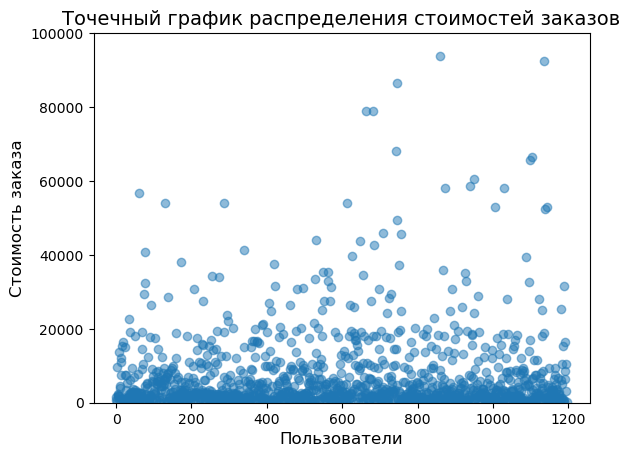

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 100000)
plt.title('Точечный график распределения стоимостей заказов', fontsize=14)
plt.ylabel('Стоимость заказа', fontsize=12)
plt.xlabel('Пользователи', fontsize=12)
plt.show()


На графике видно что заказы стоимостью более 50000 ден.ед. - единичны. Точную границу, выше которой заказы можно будет считать аномальными определим ниже.

## **3.9 Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов**

In [34]:
np.percentile(orders['revenue'], [95, 98, 99])

array([28000. , 44133.2, 58233.2])

Не более 5% заказов дороже 28000 ден.ед., не более 2% заказов дороже 44133.2 ден.ед. и не более 1% дороже 58233.2 ден.ед. Возьмем стоимость заказа выше 58233.2 за аномальную.

## **3.10	Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения**

Сформулируем гипотезы:

- Н0 - различий в среднем количестве заказов на посетителя между группами нет,
- Н1 - различия в среднем количестве заказов на посетителя между группами есть.  
Для расчета статистической значимости различий в конверсии между группами нам необходимо подготовить имеющиеся данные. 

In [35]:
# Создадим таблицы с накопительными данными по визитам для каждой группы
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Объединённая таблица
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [36]:
# Таблица для пользователей групп совершивших хотя бы одну покупку
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [37]:
# Создание переменных в которых пользователям с заказами будет соответствовать число их заказов,
# а пользователям без заказов — 0

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0) 

# рассчет статистической значимости различия конверсии по результатам теста Манна-Уитни
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# рассчет относительного различия в конверсии между группами
print('Относительное различие в среднем количестве заказов на посетителя между группами по «сырым» данным:', 
      "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value = 0.017
Относительное различие в среднем количестве заказов на посетителя между группами по «сырым» данным: 0.138


p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу об отсутствии статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть. Разница в среднем количестве заказов на посетителя между группами по "сырым" данным статистически значима.
Среднее количество заказов на посетителя в группе В больше, чем в группе А.

## **3.11 Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения**

Сформулируем гипотезы:

- Н0 - различий в среднем чеке между группами нет; 
- Н1 - различия в среднем чеке между группами есть.

In [38]:
# проверим статистическую значимость различий в среднем чеке между группами
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке между группами по «сырым» данным:',
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value = 0.729
Относительное различие в среднем чеке между группами по «сырым» данным: 0.259


p-value = 0.729 значительно больше 0.05. Значит, нулевую гипотезу об отсутствии статистически значимых различий в среднем числе заказов между группами нет, отвергнуть не получится. Разница в среднем чеке между группами по "сырым" данным статистически не значима.  
Наблюдаемое различие в 25,9%  в среднем чеке между группами не является статистически значимым.

## **3.12 Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения**

Примем за аномальных пользователей тех, кто совершил более 5 заказов или совершил заказ дороже 58233 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и пользователей с аномально дорогими заказами. 

In [39]:
revenue_lim = np.percentile(orders['revenue'], 99)
orders_lim = np.percentile(ordersByUsers['orders'], 99)
print(revenue_lim)
orders_lim

58233.19999999999


4.0

In [40]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['visitor_id'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['visitor_id']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)


1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

In [41]:
# Подсчитаем количество аномальных пользователей
abnormalUsers.shape[0]


15

Всего 15 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Сформулируем гипотезы:
- H0 - различий в среднем количестве заказов на посетителя между группами нет;
- H1 - различия в среднем количестве заказов на посетителя между группами есть.

In [42]:
# Подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')], axis=0) 

In [43]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем среднем количестве заказов на посетителя между группами по «очищенным» данным:',
      '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.014
Относительное различие в среднем среднем количестве заказов на посетителя между группами по «очищенным» данным: 0.153


Результаты по среднему количеству заказов изменились незначительно. 


p-value = 0.014 (по "сырым" данным - 0.017), что меньше 0.05. Это означает, что нулевую гипотезу об отсутствии статистически значимых различий в среднем числе заказов между группами по «очищенным» данным между группами можно отвергнуть. Относительное различие в среднем количестве заказов на посетителя между группами увеличилось и стало составлять 0.153.


## **3.13 Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения**

In [44]:
print('p-value =',
      '{0:.3f}'.format(stats.mannwhitneyu
                       (orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], 
                        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительное различие в среднем чеке между группами по «очищенным» данным:',
    "{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B', 
                              np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', 
                                np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()- 1)) 


p-value = 0.851
Относительное различие в среднем чеке между группами по «очищенным» данным: -0.006


По «очищенным» данным средний чек группы А незначительно больше среднего чека группы В. По «сырым» данным было наоборот, относительное различие в среднем чеке между группами составляло 0.259. Это может означать, что на величину среднего чека влияют аномально большие заказы.

p-value = 0.851, что значительно больше 0.05. Это означает, что причин отвергать нулевую гипотезу нет. Разница в среднем чеке  между группами по «очищенным» данным статистически не значима. По «сырым» данным p-value был равен 0.729.  А значит отностительное изменени е среднего чека, которое было зафиксировано является статичтически незначимым.


## **3.14 Принятие решения по результатам теста**

Задачей исследования было:
- приоритизировать гипотезы,
- проанализировать результаты.


В ходе приоритизации гипотез по фреймворкам ICE и RICE удалось определить наиболее важную из них: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" 

По результатам анализа А/В теста выявлено:
- кумулятивная выручка в группе В выше, чем в группе А, практически на всем протяжении теста;
- кумулятивный средний чек группы В выше среднего чека группы А к концу теста, но его значения еще не устоялись;
- кумулятивное среднее количество заказов на посетителя в группе В выше, чем в группе А, практически на всем протяжении теста.


В ходе анализа теста определены аномальные пользователи, совершившие более 4 заказов (1% от общего числа) и аномально дорогие заказы, стоимостью более 58233 ден.ед. (1% всех заказов).

Разница в среднем количестве заказов на посетителя между группами по "сырым" и "очищенным" данным статистически значима.
Разница в среднем чеке между группами по "сырым" и "очищенным" данным статистически не значима.

**На всем  протяжении теста группа В показала лучшие результаты, по сравнению с группой А. Средний чек практически не отличается, а среднем количестве заказов на посетителя в группе В выше, чем в группе А.**

**По результатам теста можно остановить тест и зафиксировать победу группы В.**
